,Group,CFU/ml_1,CFU/ml_2,CFU/ml_3,No_Species_1,No_Species_2,No_Species_3
0,Group 1,Calculated CFU/ml,NaN,NaN,Number of different species,NaN,NaN
1,Pair:,1,2,3,1,2.0,3.0
2,LB agar,9.1*10^7,1.8*10^6,9.8*10^5,5,2.0,7.0
3,Actinomycete isolation agar,9.1*10^5,1*10^6,1.4*10^6,11,3.0,7.0
5,Group 2,Calculated CFU/ml,NaN,NaN,Number of different species,NaN,NaN
6,Pair:,1,2,3,1,2.0,3.0
7,LB agar,1.8*10^6,1.2*10^8,1.3*10^6,6,12.0,9.0
8,Actinomycete isolation agar,2*10^6,6*10^6,1.6*10^6,5,5.0,6.0
10,Group 3,Calculated CFU/ml,NaN,NaN,Number of different species,NaN,NaN
11,Pair:,1,2,3,1,2.0,3.0


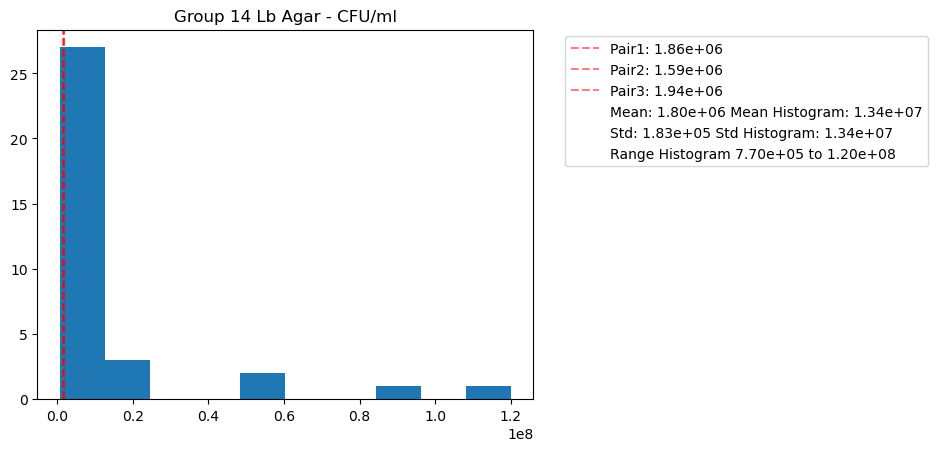

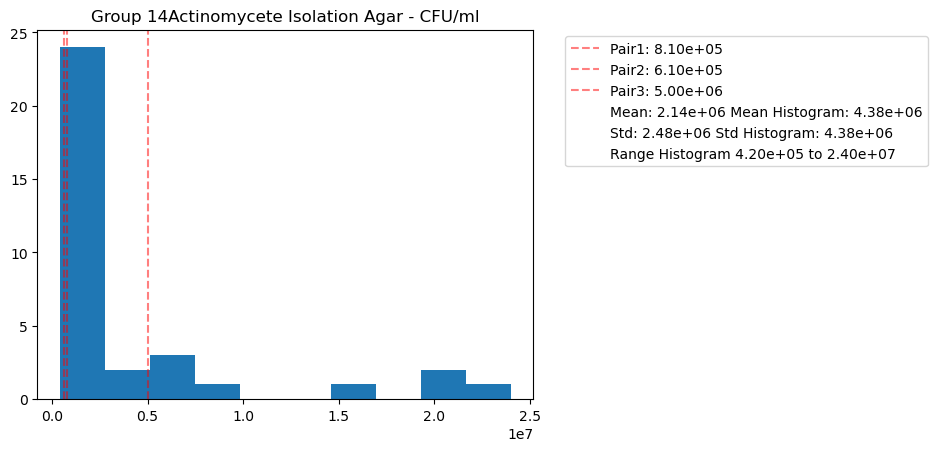

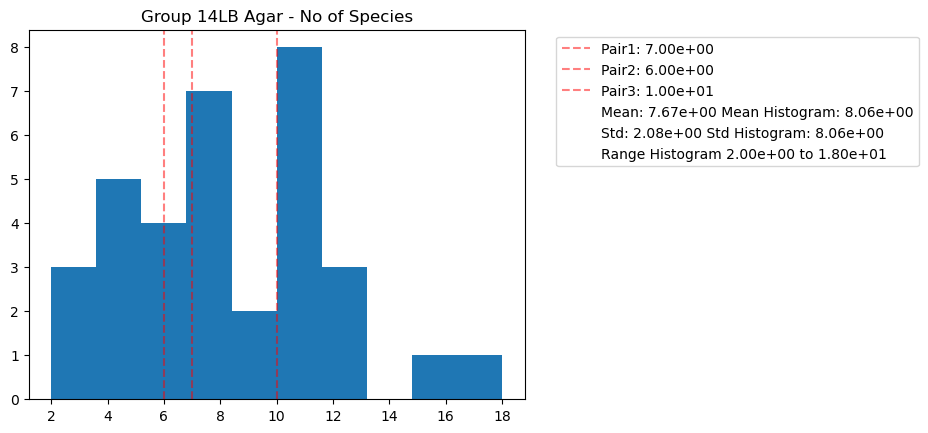

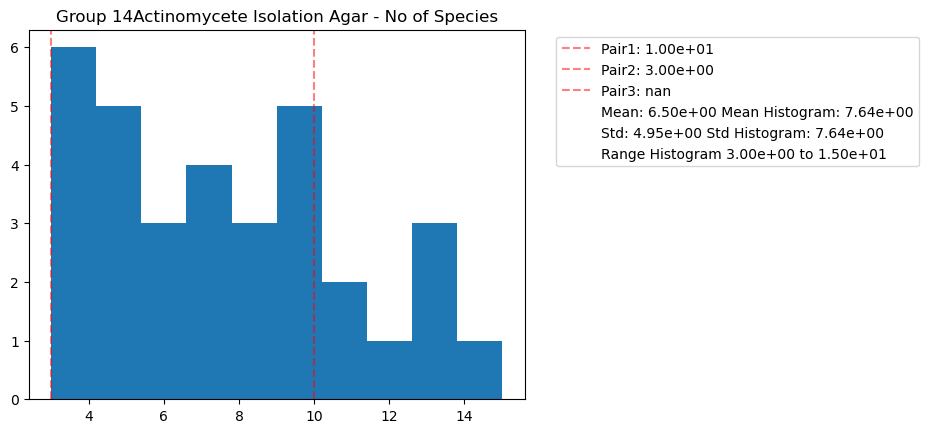

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML
def convert_to_float(value):
    if pd.isna(value) or value == '-' or value == 'N/A':
        return np.nan
    if isinstance(value, str):
        if 'E' in value:
            return float(value)
        elif '*10^' in value:
            base, exp = value.split('*10^')
            return float(base) * 10**float(exp)
        else:
            return float(value)
    return float(value)
def media(frame,headers,tag,condition):
    output = []
# Loop through the dataframe
    for index, row in frame.iterrows():
#        print("row",row)
        if "Group" in str(row['Group']) and tag in str(row[headers[0]]):
#            print("row[headers[0]]",row[headers[0]]," tag ",tag)
            current_group = row['Group']  # Update current group when a new group header is found
        if pd.isna(row[headers[0]]):  # Skip rows with no data
#            print("row[headers[0]]",row[headers[0]])
            continue
#        print("condition,str(row['Group'])",condition,str(row['Group']))
        if condition in str(row['Group']):  # Checking if the row is specific to LB Agar
#            print("Cond 3",row[headers[0]])
            output.append(current_group)
            output.append(convert_to_float(row[headers[0]]))
            output.append(convert_to_float(row[headers[1]]))
            output.append(convert_to_float(row[headers[2]]))
    return output

# Read data

df=pd.read_csv("GroupB.csv",header=None)
df.columns = ['Group','CFU/ml_1','CFU/ml_2','CFU/ml_3','No_Species_1','No_Species_2','No_Species_3'] # Insert header column
df.dropna(axis = 0, how = 'all', inplace = True) # Drop lines where all entries ar NaN
display(HTML(df.to_html())) # Pretty display of the dataframe

#Set your Group
GroupName='Group 14'

# Initialize an empty list the group name and pairs for each condition
lb_agar_cfu_list = []
lb_agar_cfu_histogram = []
lb_agar_cfu_group = []

actino_cfu_list = []
actino_cfu_histogram = []
actino_cfu_group = []

lb_agar_species = []
lb_agar_species_histogram = []

actino_species = []
actino_species_histogram = []

# Variable to keep track of the current group name
current_group = None

# Loop through the dataframe

# Function media returns a list of the numbers for all pairs for 'CFU/ml' or 'Number of Species' for each condition, LB or AIA 

lb_agar_cfu_list=media(df,['CFU/ml_1','CFU/ml_2','CFU/ml_3'],'Calculated CFU/ml','LB agar')
actino_cfu_list=media(df,['No_Species_1','No_Species_2','No_Species_3'],'Number of different species','Actinomycete isolation agar')
actino_cfu_list=media(df,['CFU/ml_1','CFU/ml_2','CFU/ml_3'],'Calculated CFU/ml','Actinomycete isolation agar')
lb_agar_species=media(df,['No_Species_1','No_Species_2','No_Species_3'],'Number of different species','LB agar')
actino_species=media(df,['No_Species_1','No_Species_2','No_Species_3'],'Number of different species','Actinomycete isolation agar')

def histogram_list(input_list, group_match):
    # FUnction takes list for a condition, where every 4'th value is a group number.
    #  Group numbers and "NaN" are removed. The cleaned up list is returned.
    op_hist=[] # Intialise Returned histogram list
    group_values=[] # Values for group_match
    in_play=-1 #counter after finding a group_match
    for i in range(len(input_list)): # Skip every fourth element, which is a group number
        if(i%4==0 and input_list[i]==group_match):
            in_play+=1
        if(i%4>0):
            if(in_play>-1):
                in_play+=1
            if(in_play>0 and in_play<4):
                group_values.append(input_list[i])
            if( not pd.isna(input_list[i])):   # If element is a number include.
                op_hist.append(input_list[i])
    return op_hist, group_values


# Calculate all conditions and variables as a list to be plotted as a histogram,
lb_agar_cfu_histogram=histogram_list(lb_agar_cfu_list,GroupName)[0]
lb_agar_cfu_group=histogram_list(lb_agar_cfu_list,GroupName)[1]
actino_histogram=histogram_list(actino_cfu_list,GroupName)[0]
actino_cfu_group = histogram_list(actino_cfu_list,GroupName)[1]
lb_agar_species_histogram=histogram_list(lb_agar_species,GroupName)[0]
lb_agar_species_group=histogram_list(lb_agar_species,GroupName)[1]
actino_species_histogram=histogram_list(actino_species,GroupName)[0]
actino_species_group=histogram_list(actino_species,GroupName)[1]

# print("lb_agar_cfu_group",lb_agar_cfu_group)
#print("lb_agar_cfu_group",lb_agar_cfu_group)
#print(lb_agar_cfu_histogram)
#print(histogram_list(lb_agar_cfu_list))
#print("actino_histogram",actino_histogram)
#print(histogram_list(actino_cfu_list))

#print(lb_agar_species)
#print(histogram_list(lb_agar_species,'Group 1'))
#print(actino_species_histogram)

# Plot each histogram
def histo_plot(title,hist_list,group_list,extent):
    import statistics
    plt.title(title)
    plt.hist(hist_list,range=extent)
    for idx, value in enumerate(group_list):
        plt.axvline(x=value, color='red', linestyle='--', alpha=0.5, 
                label=f'Pair{idx+1}: {value:.2e}')
    group_list = [x for x in group_list if not np.isnan(x)]
    mean_group_list = statistics.mean(group_list)
    if(len(group_list)<2):
        std_group_list=-1
    else:
        std_group_list = statistics.stdev(group_list)
    mean_hist = statistics.mean(hist_list)
    std_hist = statistics.mean(hist_list)
    min_hist=min(hist_list)
    max_hist=max(hist_list)
    plt.plot([], [], ' ', label=f'Mean: {mean_group_list:.2e} Mean Histogram: {mean_hist:.2e}')
    if(std_group_list<0):
        plt.plot([], [], ' ', label=f'Std: Indeterminate Std Histogram: {std_hist:.2e}')    
    else:
        plt.plot([], [], ' ', label=f'Std: {std_group_list:.2e} Std Histogram: {std_hist:.2e}')
    plt.plot([], [], ' ', label=f'Range Histogram {min_hist:.2e} to {max_hist:.2e}')

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


# Plot histograms - title, histogram values, group values, range of histogram from min to max. Change range if outliers making majority appear in first bin.
histo_plot(GroupName+' Lb Agar - CFU/ml',lb_agar_cfu_histogram,lb_agar_cfu_group,[min(lb_agar_cfu_histogram),max(lb_agar_cfu_histogram)])    
histo_plot(GroupName+'Actinomycete Isolation Agar - CFU/ml',actino_histogram,actino_cfu_group,[min(actino_histogram),max(actino_histogram)]) 
histo_plot(GroupName+'LB Agar - No of Species',lb_agar_species_histogram,lb_agar_species_group,[min(lb_agar_species_histogram),max(lb_agar_species_histogram)]) 
histo_plot(GroupName+'Actinomycete Isolation Agar - No of Species',actino_species_histogram,actino_species_group,[min(actino_species_histogram),max(actino_species_histogram)]) 



lb_agar_cfu Tests:


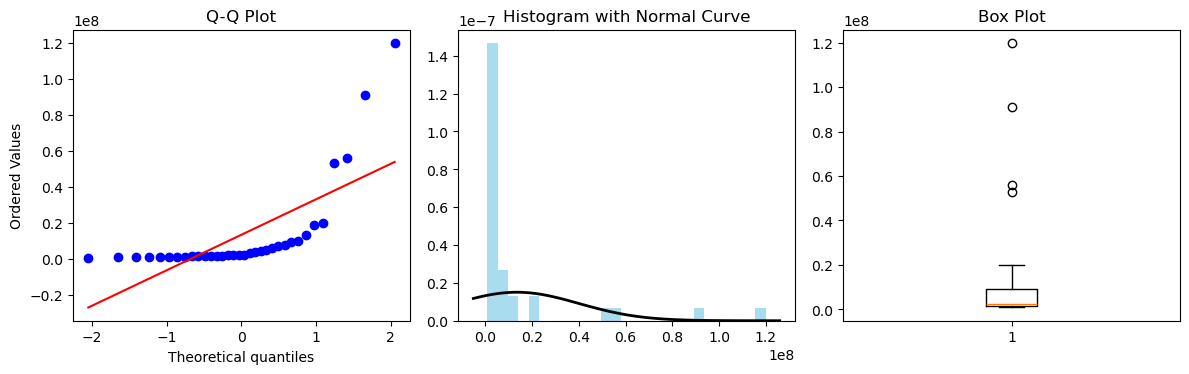


Shapiro-Wilk Test:
  statistic: 0.515641854920172
  p-value: 1.8971931841781466e-09

Anderson-Darling Test:
  statistic: 6.76446607845017
  critical_values: [0.526 0.599 0.718 0.838 0.996]
  significance_level: [15.  10.   5.   2.5  1. ]

Kolmogorov-Smirnov Test:
  statistic: 1.0
  p-value: 0.0

Jarque-Bera Test:
  statistic: 118.55410071605803
  p-value: 1.8042807931195366e-26
lb_agar_cfu Tests:


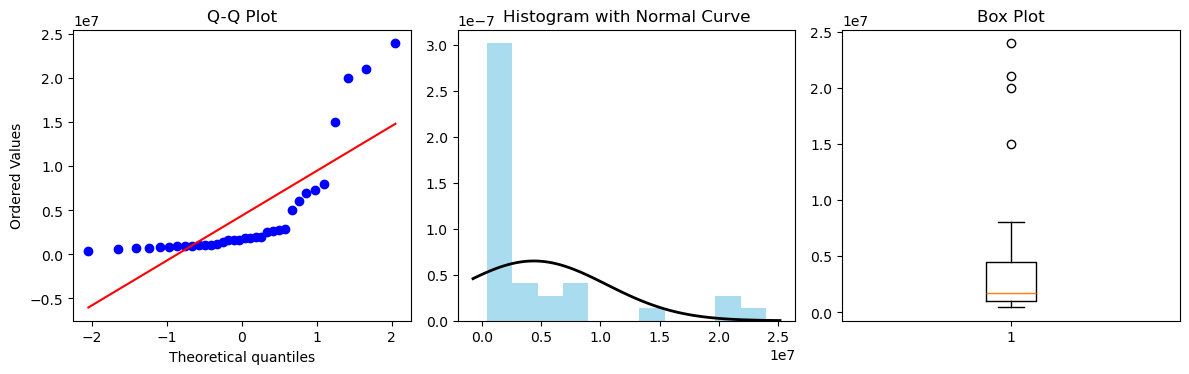


Shapiro-Wilk Test:
  statistic: 0.6262727230614197
  p-value: 4.334819514132662e-08

Anderson-Darling Test:
  statistic: 5.182406250757239
  critical_values: [0.526 0.599 0.718 0.838 0.996]
  significance_level: [15.  10.   5.   2.5  1. ]

Kolmogorov-Smirnov Test:
  statistic: 1.0
  p-value: 0.0

Jarque-Bera Test:
  statistic: 39.68860874521499
  p-value: 2.4083972007923865e-09
lb_agar_cfu Tests:


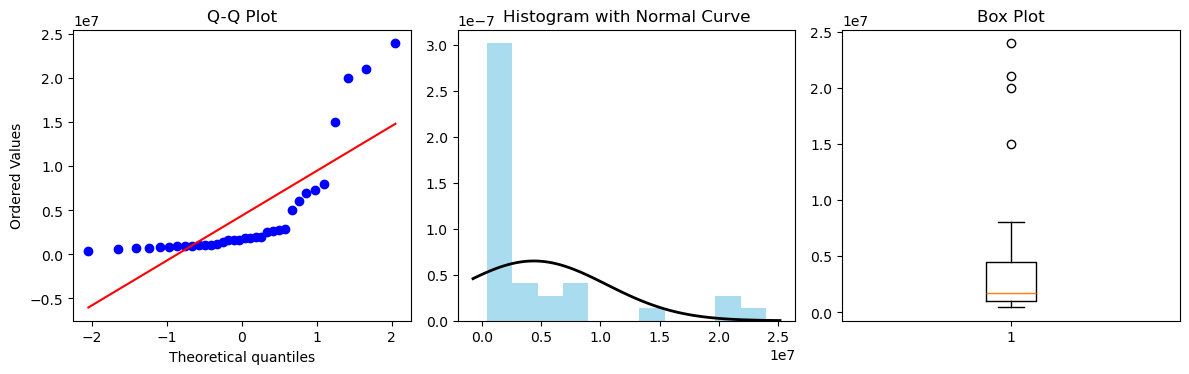


Shapiro-Wilk Test:
  statistic: 0.6262727230614197
  p-value: 4.334819514132662e-08

Anderson-Darling Test:
  statistic: 5.182406250757239
  critical_values: [0.526 0.599 0.718 0.838 0.996]
  significance_level: [15.  10.   5.   2.5  1. ]

Kolmogorov-Smirnov Test:
  statistic: 1.0
  p-value: 0.0

Jarque-Bera Test:
  statistic: 39.68860874521499
  p-value: 2.4083972007923865e-09
lb_agar_species_histogram Tests:


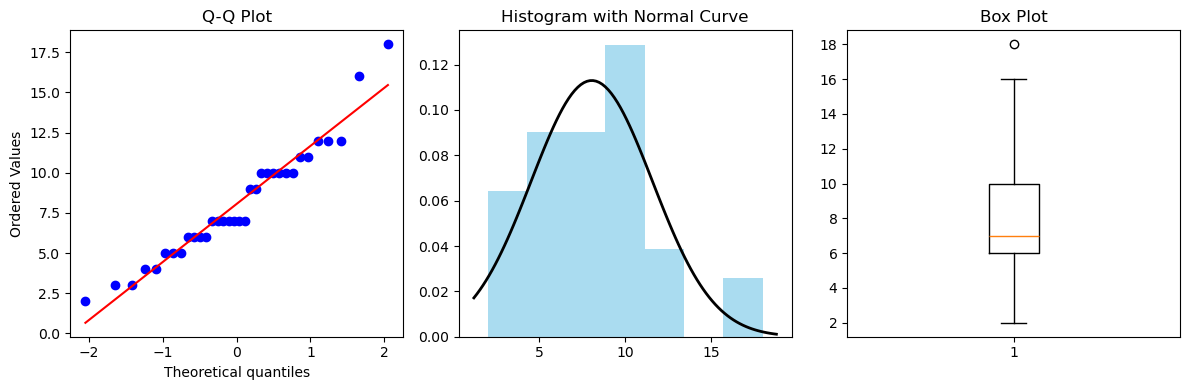


Shapiro-Wilk Test:
  statistic: 0.9491650599156569
  p-value: 0.11591353685061984

Anderson-Darling Test:
  statistic: 0.5782982737335232
  critical_values: [0.526 0.599 0.718 0.838 0.996]
  significance_level: [15.  10.   5.   2.5  1. ]

Kolmogorov-Smirnov Test:
  statistic: 0.9772498680518208
  p-value: 2.744626617764943e-56

Jarque-Bera Test:
  statistic: 2.918367821790509
  p-value: 0.2324258775791793
actino_species_histogram Tests:


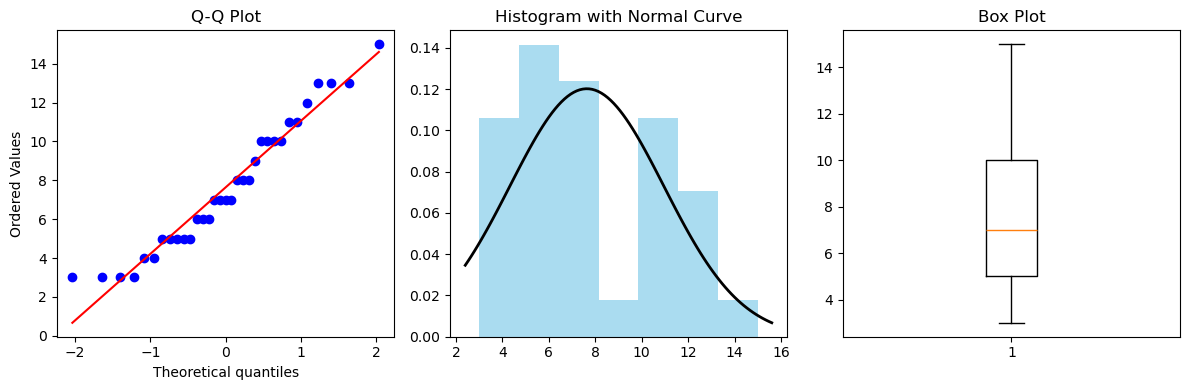


Shapiro-Wilk Test:
  statistic: 0.9457120162515927
  p-value: 0.09969618515478142

Anderson-Darling Test:
  statistic: 0.5450416142322609
  critical_values: [0.524 0.597 0.717 0.836 0.994]
  significance_level: [15.  10.   5.   2.5  1. ]

Kolmogorov-Smirnov Test:
  statistic: 0.9986501019683699
  p-value: 3.989898153562134e-95

Jarque-Bera Test:
  statistic: 1.8400205108162098
  p-value: 0.39851495413006693


In [68]:
import scipy.stats as stats
import matplotlib.pyplot as plt

def test_normality(data):
    """
    Perform multiple normality tests on the input data.
    
    Parameters:
    -----------
    data : numpy.ndarray
        Input array to test for normality
    
    Returns:
    --------
    dict : A dictionary containing results of different normality tests
    """
    # Shapiro-Wilk Test
    shapiro_statistic, shapiro_p_value = stats.shapiro(data)
    
    # Anderson-Darling Test
    anderson_result = stats.anderson(data, dist='norm')
    
    # Kolmogorov-Smirnov Test
    ks_statistic, ks_p_value = stats.kstest(data, 'norm')
    
    # Jarque-Bera Test
    jarque_statistic, jarque_p_value = stats.jarque_bera(data)
    
    # Visual Tests
    plt.figure(figsize=(12, 4))
    
    # Q-Q Plot
    plt.subplot(131)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title('Q-Q Plot')
    
    # Histogram with Normal Distribution Overlay
    plt.subplot(132)
    plt.hist(data, bins='auto', density=True, alpha=0.7, color='skyblue')
    mu, std = np.mean(data), np.std(data)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.title('Histogram with Normal Curve')
    
    # Box Plot
    plt.subplot(133)
    plt.boxplot(data)
    plt.title('Box Plot')
    
    plt.tight_layout()
    plt.show()
    
    # Compile results
    results = {
        "Shapiro-Wilk Test": {
            "statistic": shapiro_statistic,
            "p-value": shapiro_p_value
        },
        "Anderson-Darling Test": {
            "statistic": anderson_result.statistic,
            "critical_values": anderson_result.critical_values,
            "significance_level": anderson_result.significance_level
        },
        "Kolmogorov-Smirnov Test": {
            "statistic": ks_statistic,
            "p-value": ks_p_value
        },
        "Jarque-Bera Test": {
            "statistic": jarque_statistic,
            "p-value": jarque_p_value
        }
    }
    
    return results


print("lb_agar_cfu Tests:")
lb_agar_cfu_histogram_results = test_normality(lb_agar_cfu_histogram)
for test, metrics in lb_agar_cfu_histogram_results.items():
    print(f"\n{test}:")
    for key, value in metrics.items():
        print(f"  {key}: {value}")


print("lb_agar_cfu Tests:")
actino_histogram_results = test_normality(actino_histogram)
for test, metrics in actino_histogram_results.items():
    print(f"\n{test}:")
    for key, value in metrics.items():
        print(f"  {key}: {value}")


print("lb_agar_cfu Tests:")
actino_histogram_results = test_normality(actino_histogram)
for test, metrics in actino_histogram_results.items():
    print(f"\n{test}:")
    for key, value in metrics.items():
        print(f"  {key}: {value}")

print("lb_agar_species_histogram Tests:")
lb_agar_species_histogram_results = test_normality(lb_agar_species_histogram)
for test, metrics in lb_agar_species_histogram_results.items():
    print(f"\n{test}:")
    for key, value in metrics.items():
        print(f"  {key}: {value}")

print("actino_species_histogram Tests:")
actino_species_histogram_results = test_normality(actino_species_histogram)
for test, metrics in actino_species_histogram_results.items():
    print(f"\n{test}:")
    for key, value in metrics.items():
        print(f"  {key}: {value}")



/tmp/ipykernel_322/2811142173.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([array1, array2], labels=['Group 1', 'Group 2'])


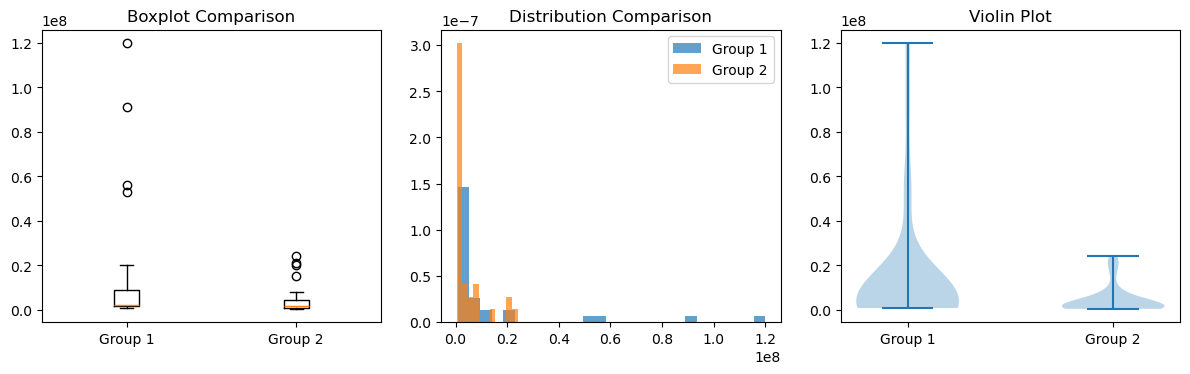

Mann-Whitney U Test Analysis:

Group 1:
  median: 2130000.0
  mean: 13423235.294117646
  std: 26905396.858711768
  size: 34

Group 2:
  median: 1730000.0
  mean: 4381176.470588235
  std: 6227095.127384051
  size: 34

Mann-Whitney U Test Results:
  U-statistic: 739.5
  p-value: 0.04827251875575626
  statistically_significant: True

Interpretation:
  Reject null hypothesis if p-value < 0.05


In [69]:
def perform_mann_whitney_test(array1, array2):
    """
    Perform a Mann-Whitney U test between two NumPy arrays.
    
    Parameters:
    -----------
    array1 : numpy.ndarray
        First sample array
    array2 : numpy.ndarray
        Second sample array
    
    Returns:
    --------
    dict : A dictionary containing Mann-Whitney U test results
    """
    # Perform Mann-Whitney U test
    statistic, p_value = stats.mannwhitneyu(array1, array2, alternative='two-sided')
    
    # Compute descriptive statistics
    results = {
        "Group 1": {
            "median": np.median(array1),
            "mean": np.mean(array1),
            "std": np.std(array1, ddof=1),
            "size": len(array1)
        },
        "Group 2": {
            "median": np.median(array2),
            "mean": np.mean(array2),
            "std": np.std(array2, ddof=1),
            "size": len(array2)
        },
        "Mann-Whitney U Test Results": {
            "U-statistic": statistic,
            "p-value": p_value,
            "statistically_significant": p_value < 0.05
        },
        "Interpretation": "Reject null hypothesis if p-value < 0.05"
    }
    
    # Visualize distributions
    plt.figure(figsize=(12, 4))
    
    # Boxplot
    plt.subplot(131)
    plt.boxplot([array1, array2], labels=['Group 1', 'Group 2'])
    plt.title('Boxplot Comparison')
    
    # Kernel Density Estimation
    plt.subplot(132)
    plt.hist(array1, bins='auto', density=True, alpha=0.7, label='Group 1')
    plt.hist(array2, bins='auto', density=True, alpha=0.7, label='Group 2')
    plt.title('Distribution Comparison')
    plt.legend()
    
    # Violin Plot
    plt.subplot(133)
    plt.violinplot([array1, array2])
    plt.title('Violin Plot')
    plt.xticks([1, 2], ['Group 1', 'Group 2'])
    
    plt.tight_layout()
    plt.show()
    
    return results

# Example usage

# Perform Mann-Whitney U test
mw_results = perform_mann_whitney_test(lb_agar_cfu_histogram, actino_histogram)

# Print results
print("Mann-Whitney U Test Analysis:")
for key, value in mw_results.items():
    print(f"\n{key}:")
    if isinstance(value, dict):
        for subkey, subvalue in value.items():
            print(f"  {subkey}: {subvalue}")
    else:
        print(f"  {value}")
        

/tmp/ipykernel_322/3792678665.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([array1, array2], labels=['Group 1', 'Group 2'])


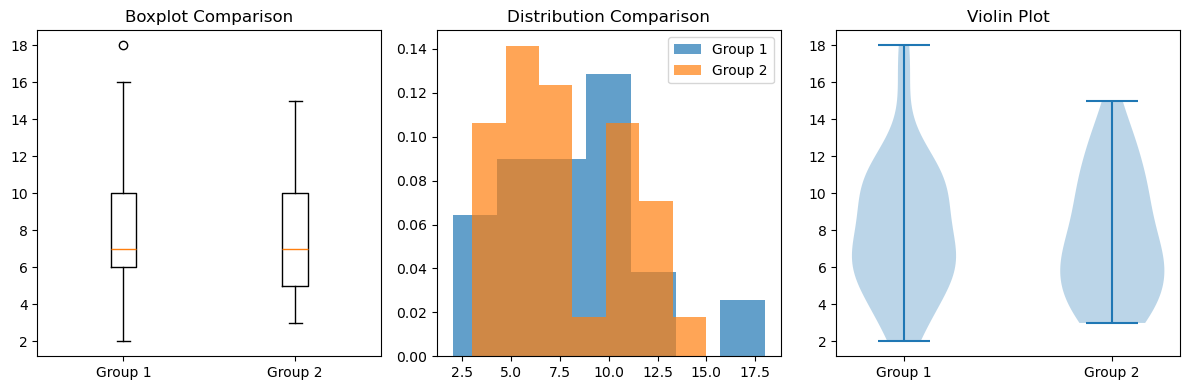

T-Test Analysis:

Group 1:
  mean: 8.058823529411764
  std: 3.5839809968938527
  size: 34

Group 2:
  mean: 7.636363636363637
  std: 3.37099931231621
  size: 33

T-Test Results:
  t-statistic: 0.49713400205939423
  p-value: 0.6207735901352276
  statistically_significant: False

Interpretation:
  Reject null hypothesis if p-value < 0.05


In [71]:
def perform_ttest(array1, array2, equal_var=False):
    """
    Perform a two-sided independent t-test between two NumPy arrays.
    
    Parameters:
    -----------
    array1 : numpy.ndarray
        First sample array
    array2 : numpy.ndarray
        Second sample array
    equal_var : bool, optional (default=False)
        Whether to assume equal variances between groups
        
    Returns:
    --------
    dict : A dictionary containing t-test results
    """
    # Compute t-statistic and p-value
    t_statistic, p_value = stats.ttest_ind(array1, array2, equal_var=equal_var)
    
    # Compute descriptive statistics
    results = {
        "Group 1": {
            "mean": np.mean(array1),
            "std": np.std(array1, ddof=1),
            "size": len(array1)
        },
        "Group 2": {
            "mean": np.mean(array2),
            "std": np.std(array2, ddof=1),
            "size": len(array2)
        },
        "T-Test Results": {
            "t-statistic": t_statistic,
            "p-value": p_value,
            "statistically_significant": p_value < 0.05
        },
        "Interpretation": "Reject null hypothesis if p-value < 0.05"
    }
     # Visualize distributions
    plt.figure(figsize=(12, 4))
    
    # Boxplot
    plt.subplot(131)
    plt.boxplot([array1, array2], labels=['Group 1', 'Group 2'])
    plt.title('Boxplot Comparison')
    
    # Kernel Density Estimation
    plt.subplot(132)
    plt.hist(array1, bins='auto', density=True, alpha=0.7, label='Group 1')
    plt.hist(array2, bins='auto', density=True, alpha=0.7, label='Group 2')
    plt.title('Distribution Comparison')
    plt.legend()
    
    # Violin Plot
    plt.subplot(133)
    plt.violinplot([array1, array2])
    plt.title('Violin Plot')
    plt.xticks([1, 2], ['Group 1', 'Group 2'])
    
    plt.tight_layout()
    plt.show()
    
    
    return results

# Example usage
np.random.seed(42)

# Generate two sample arrays

# Perform t-test
ttest_results = perform_ttest(lb_agar_species_histogram,actino_species_histogram)

# Print results
print("T-Test Analysis:")
for key, value in ttest_results.items():
    print(f"\n{key}:")
    if isinstance(value, dict):
        for subkey, subvalue in value.items():
            print(f"  {subkey}: {subvalue}")
    else:
        print(f"  {value}")
